In [49]:
import numpy as np
import pandas as pd

In [50]:
col_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex',
             'capital-gain','capital-loss','hours-per-week','native-country','income']

In [51]:
df = pd.read_csv('adult.csv',names=col_names)

In [52]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [53]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [55]:
cols = df.select_dtypes(include=['number'])
for col in cols:
    neg = (df[col] < 0).sum()
    print(f"negatives in {col}: {neg}")

negatives in age: 0
negatives in fnlwgt: 0
negatives in education-num: 0
negatives in capital-gain: 0
negatives in capital-loss: 0
negatives in hours-per-week: 0


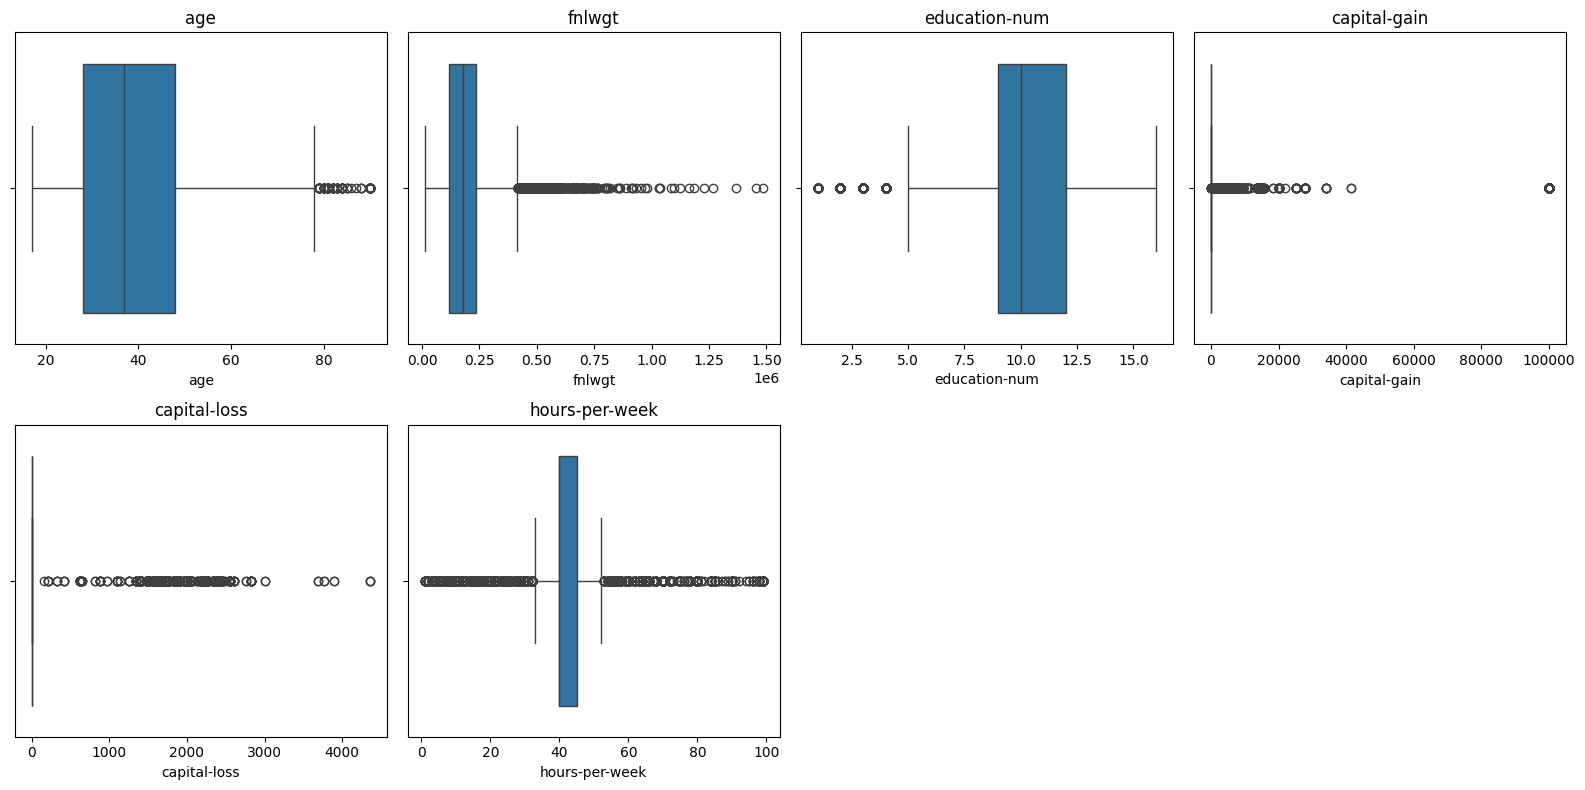

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

def visboxplots(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    cols = len(numeric_cols)
    
    rows = (cols + 3) // 4
    cols = min(cols, 4)
    
    fig,axes = plt.subplots(rows, cols, figsize=(16,4*rows))
    
    if rows > 1:
        axes=axes.flatten()
        
    for i,col in enumerate(numeric_cols):
        sns.boxplot(x=df[col],ax=axes[i])
        axes[i].set_title(col)
        
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()
    
visboxplots(df)    

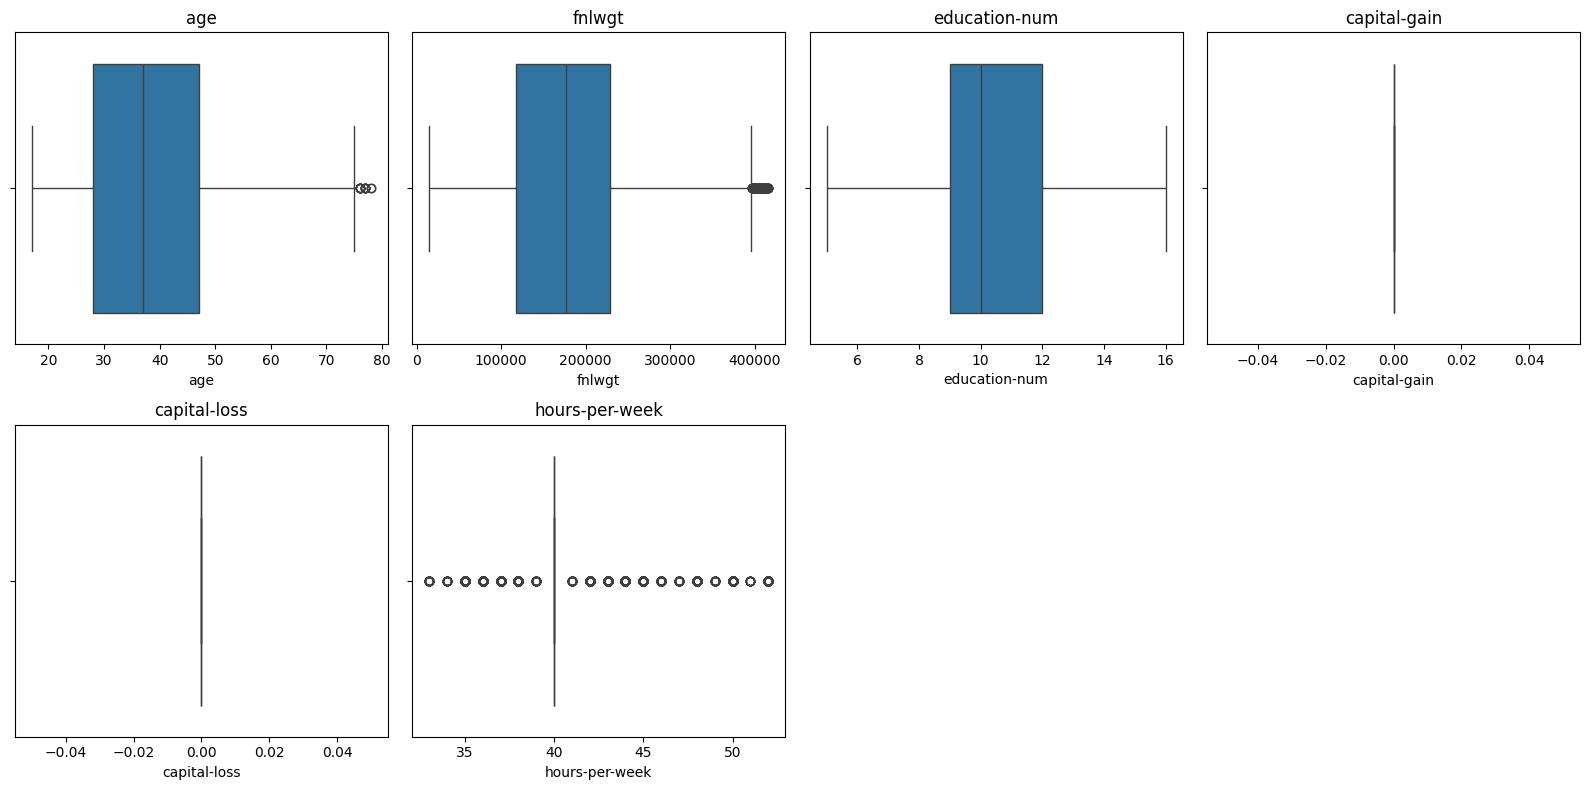

In [57]:
def rem1(df):
    numeric_cols = df.select_dtypes(include=['number'])
    zscore = np.abs((numeric_cols - numeric_cols.mean()) / numeric_cols.std())
    out = zscore > 3
    df = df[~out.any(axis=1)]
    return df

def rem2(df):
    
    numeric_df = df.select_dtypes(include=['number'])
    categorical_df = df.select_dtypes(exclude=['number'])
    
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    
    IQR = Q3 - Q1
    
    low = Q1 - 1.5 * IQR
    up = Q3 + 1.5 * IQR
    
    filtered_df = numeric_df[~((numeric_df < low) | (numeric_df > up)).any(axis=1)]
    
    comb = pd.concat([filtered_df,categorical_df], axis=1)
    comb.dropna(inplace=True)
    
    return comb

ndf = rem2(df)
df = ndf
visboxplots(df)

In [58]:
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
2,38.0,215646.0,9.0,0.0,0.0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53.0,234721.0,7.0,0.0,0.0,40.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28.0,338409.0,13.0,0.0,0.0,40.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
5,37.0,284582.0,14.0,0.0,0.0,40.0,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
7,52.0,209642.0,9.0,0.0,0.0,45.0,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53.0,321865.0,14.0,0.0,0.0,40.0,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
32555,22.0,310152.0,10.0,0.0,0.0,40.0,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32556,27.0,257302.0,12.0,0.0,0.0,38.0,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,40.0,154374.0,9.0,0.0,0.0,40.0,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K


In [59]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
lb.fit(df['sex'])

lb.classes_

df['sex'] = lb.transform(df['sex'])
lb.classes_

df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
2,38.0,215646.0,9.0,0.0,0.0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,United-States,<=50K
3,53.0,234721.0,7.0,0.0,0.0,40.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,United-States,<=50K
4,28.0,338409.0,13.0,0.0,0.0,40.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,Cuba,<=50K
5,37.0,284582.0,14.0,0.0,0.0,40.0,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,0,United-States,<=50K
7,52.0,209642.0,9.0,0.0,0.0,45.0,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,1,United-States,>50K


In [60]:
df['race'] = lb.fit_transform(df['race'])
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
2,38.0,215646.0,9.0,0.0,0.0,40.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,4,1,United-States,<=50K
3,53.0,234721.0,7.0,0.0,0.0,40.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,2,1,United-States,<=50K
4,28.0,338409.0,13.0,0.0,0.0,40.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,2,0,Cuba,<=50K
5,37.0,284582.0,14.0,0.0,0.0,40.0,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,4,0,United-States,<=50K
7,52.0,209642.0,9.0,0.0,0.0,45.0,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,4,1,United-States,>50K


In [61]:
df['income'] = lb.fit_transform(df['income'])

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [63]:
dfr = df
for col in dfr.columns:
    dfr[col] = lb.fit_transform(dfr[col])
dfr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
2,21,9527,4,0,0,7,4,8,0,6,1,4,1,38,0
3,36,10398,2,0,0,7,4,1,2,6,0,2,1,38,0
4,11,13019,8,0,0,7,4,6,2,10,5,2,0,5,0
5,20,11927,9,0,0,7,4,9,2,4,5,4,0,38,0
7,35,9208,4,0,0,12,6,8,2,4,0,4,1,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,36,12724,9,0,0,7,4,9,2,4,0,4,1,38,1
32555,5,12491,5,0,0,7,4,11,4,11,1,4,1,38,0
32556,10,11176,7,0,0,5,4,4,2,13,5,4,0,38,0
32557,23,5335,4,0,0,7,4,8,2,7,0,4,1,38,1


In [64]:
X = dfr.drop('income', axis=1)
Y = dfr['income']

In [65]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [66]:
modelLR = LogisticRegression()
modelLR.fit(X_train, Y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
y_pred = modelLR.predict(X_test)

In [68]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [69]:
accuracy_score(Y_test,y_pred)

0.8052631578947368

In [70]:
modelNB = GaussianNB()
modelNB.fit(X_train, Y_train)

GaussianNB()

In [71]:
y_pred = modelNB.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [72]:
accuracy_score(Y_test, y_pred)

0.7924210526315789